In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Clean data
clean_df = pd.read_pickle("train_set.pkl")
val_df = pd.read_pickle("val_set.pkl")

### RF Models

C:\Users\Kaustubh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training time: 7.866844654083252 seconds
Training Accuracy: 0.8601
Evaluation time: 0.59433913230896 seconds
              precision    recall  f1-score   support

      Center       0.30      0.55      0.39      1074
       Donut       0.10      0.34      0.16       139
    Edge-Loc       0.13      0.27      0.18      1297
   Edge-Ring       0.65      0.90      0.76      2420
         Loc       0.10      0.19      0.13       898
   Near-full       0.93      1.00      0.96        37
      Random       0.52      0.81      0.63       217
     Scratch       0.01      0.01      0.01       298
        none       0.95      0.84      0.89     36857

    accuracy                           0.80     43237
   macro avg       0.41      0.55      0.46     43237
weighted avg       0.87      0.80      0.83     43237

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth'

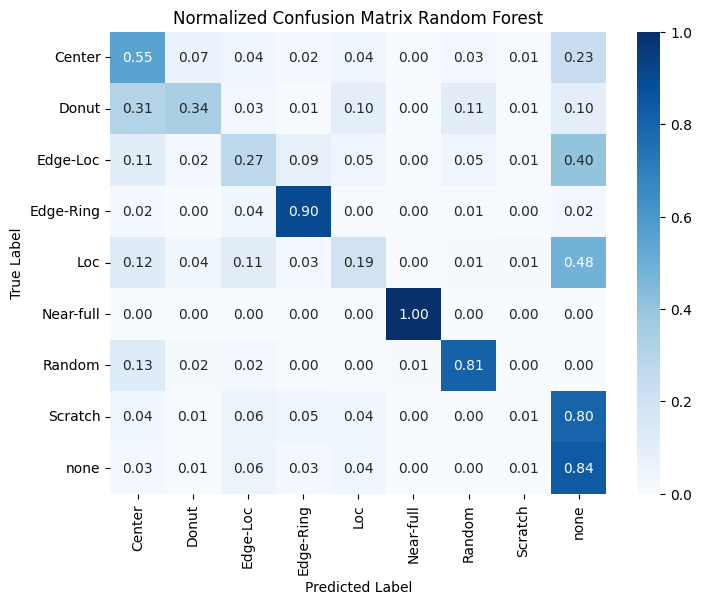

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define columns
region_features = [f"Region_{i}" for i in range(1, 26)]
radial_features = [f"Radial_Zone_{i}" for i in range(1, 7)]
total_defects = ['Total_Defect_Density']
features = region_features + radial_features + total_defects

# Define feature/target variable
X_train = clean_df[features] 
y_train = clean_df['Defect_Class']
X_test = val_df[features] 
y_test = val_df['Defect_Class'] 

# Define the Random Forest model
rf = RandomForestClassifier(random_state=3, n_jobs=-1)

# Grid
param_grid = {
    'n_estimators': [1000],  
    'max_depth': [70],  
    'min_samples_split': [2], 
    'min_samples_leaf': [2],  
    'max_features': ['log2'], 
}

# Set up GridSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=3)

# Start Time
import time
start = time.time()

# Fit the model
random_search.fit(X_train, y_train)

# End Time
end = time.time()
print(f"Training time: {end - start} seconds")

# Get the best model
best_rf = random_search.best_estimator_
train_accuracy = best_rf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions
start = time.time()
y_pred = best_rf.predict(X_test)
end = time.time()
print(f"Evaluation time: {end - start} seconds")
# Print classification report
print(classification_report(y_test, y_pred))

# Print best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix Random Forest')
plt.show()

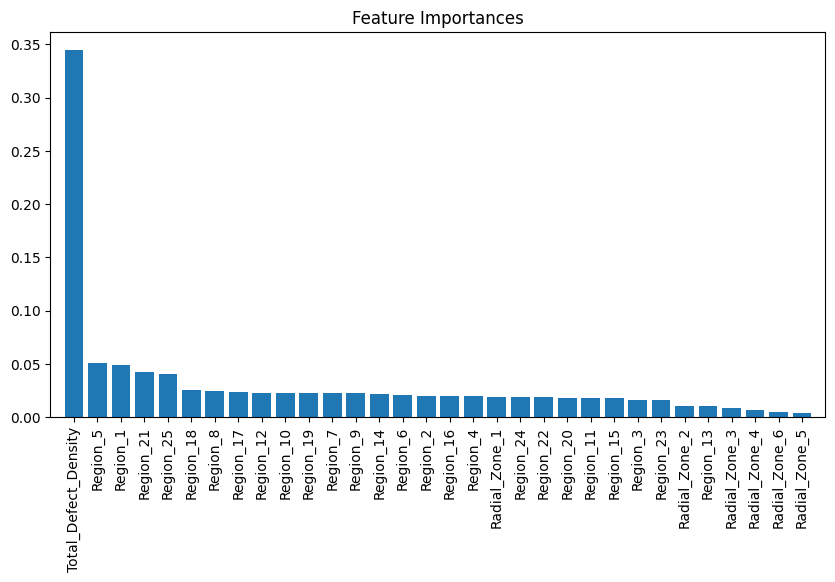

In [3]:
# Create feature importance plots
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()